<a href="https://colab.research.google.com/github/bhupeshmahara/ml-algorithms/blob/main/supervised-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Logistic Regression__

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

### 2. Data Loading and Description

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Importing packages                                          

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [ ]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isna().sum().sort_values(ascending=False)*100/891

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [ ]:
titanic_data.shape

(891, 12)

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [ ]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data['Embarked'].mode()[0]

'S'

In [ ]:
# filling the missing values in Embarked with mode

titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

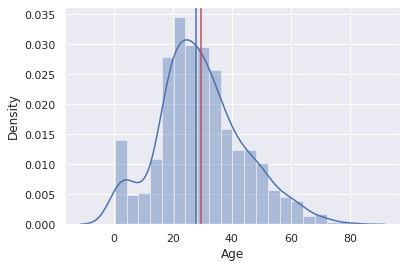

In [ ]:
# distribution of Age

sns.distplot(titanic_data.Age)
plt.axvline(titanic_data.Age.mean(), color='r')
plt.axvline(titanic_data.Age.median(), color='b')
plt.show()

>If the mean and median of a column are very near to each other, then you can fill the missing values by mean.

>If the mean and median of a column are away each other, then you can fill the missing values by median, as this column is likely to have Outliers.

In [ ]:
titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# filling the Age with median value

median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age, inplace = True)

In [ ]:
# dropping Cabin as 87% of data in Cabin is missing

titanic_data.drop('Cabin', axis = 1,inplace = True)

In [ ]:
titanic_data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Dataset is clean now

In [ ]:
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Feature Engineering

In [ ]:
# creating new feature as FamilySize

titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
# Segmenting Sex column as per Age, Age less than 15 as Child, Age greater than 15 as Males and Females as per their gender.

titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [ ]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [ ]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [ ]:
titanic_data['GenderClass'].value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [ ]:
titanic_data.groupby("GenderClass").mean()['Survived']

GenderClass
child     0.576923
female    0.760000
male      0.163569
Name: Survived, dtype: float64

In [ ]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [ ]:
# dropping columns 'PassengerId', 'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'

titanic = titanic_data.drop(['PassengerId','Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,Survived,Pclass,Age,Fare,Embarked,FamilySize,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


In [ ]:
# Dummification of GenderClass & Embarked. refer - https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies
# Dumification is also called One Hot Endcoding

titanic = pd.get_dummies(titanic, columns=['GenderClass','Embarked'], drop_first=True)

In [ ]:
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

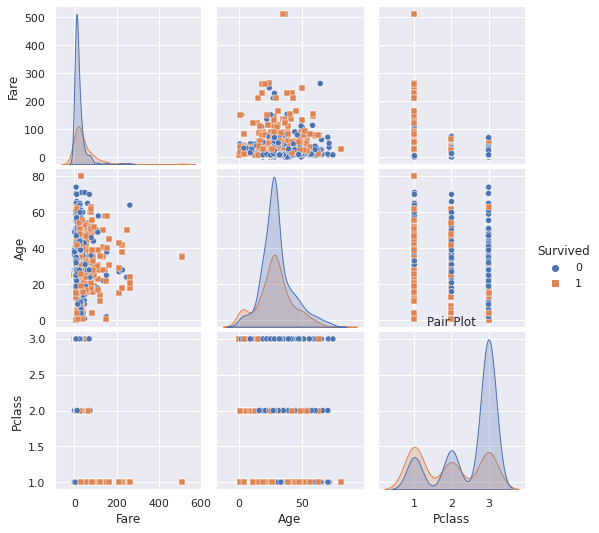

In [ ]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')
plt.show()

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

Establishing __coorelation__ between all the features using __heatmap__.

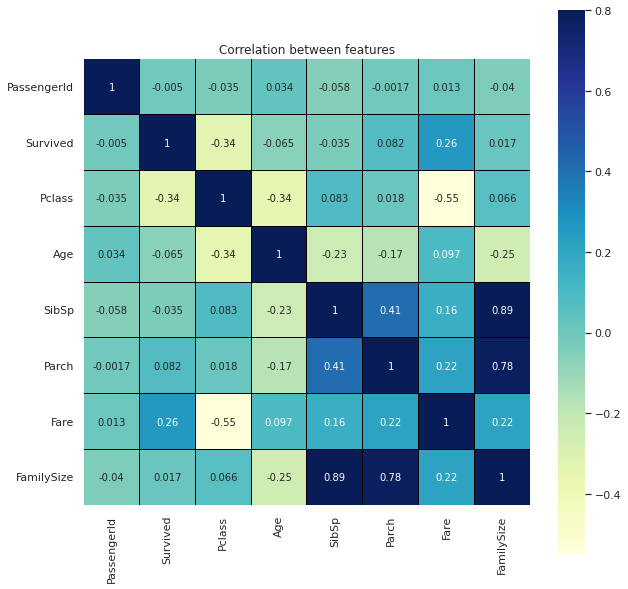

In [ ]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.show()

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

## 4. Logistic Regression

### 4.1 Introduction to Logistic Regression

Logistic regression is a techinque used for solving the __classification problem__.<br/> And Classification is nothing but a problem of __identifing__ to which of a set of __categories__ a new observation belongs, on the basis of _training dataset_ containing observations (or instances) whose categorical membership is known. <br/>For example to predict:<br/> __Whether an email is spam (1) or not (0)__ or,<br/> __Whether the tumor is malignant (1) or not (0)<br/>__
Below is the pictorial representation of a basic logistic regression model to classify set of images into _happy or sad._

Both Linear regression and Logistic regression are __supervised learning techinques__. But for the _Regression_ problem the output is __continuous__ unlike the _classification_ problem where the output is __discrete__. <br/>
- Logistic Regression is used when the __dependent variable(target) is categorical__.<br/>
- __Sigmoid function__ or logistic function is used as _hypothesis function_ for logistic regression. Below is a figure showing the difference between linear regression and logistic regression, Also notice that logistic regression produces a logistic curve, which is limited to values between 0 and 1. <br/> 

In [ ]:
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


### 4.2 Preparing X and y using pandas

In [ ]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,1,0,0,0
2,3,26.0,7.9250,1,1,0,0,1
3,1,35.0,53.1000,2,1,0,0,1
4,3,35.0,8.0500,1,0,1,0,1


In [ ]:
y = titanic.Survived 
# y = titanic['Survived']

In [ ]:
X.shape

(891, 8)

In [ ]:
y.shape

(891,)

### 4.3 Splitting X and y into training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(712, 8)
(712,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(179, 8)
(179,)


In [ ]:
X_train.head()

,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
301,3,28.0,23.2500,3,0,1,1,0
309,1,30.0,56.9292,1,1,0,0,0
516,2,34.0,10.5000,1,1,0,0,1
120,2,21.0,73.5000,3,0,1,0,1
570,2,62.0,10.5000,1,0,1,0,1


In [ ]:
X_test.head()

,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
862,1,48.0,25.9292,1,1,0,0,1
223,3,28.0,7.8958,1,0,1,0,1
84,2,17.0,10.5000,1,1,0,0,1
680,3,28.0,8.1375,1,1,0,1,0
535,2,7.0,26.2500,3,0,0,0,1


In [ ]:
y_train.shape

(712,)

### 4.4 Logistic regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    accuracy_score(y_test,y_pred_test))
    ```

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train) # study

LogisticRegression()

### 4.5 Using the Model for Prediction

In [ ]:
y_pred_train = logreg.predict(X_train)

In [ ]:
# make predictions on the testing set
y_pred_test = logreg.predict(X_test)

In [ ]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

- We need an evaluation metric in order to compare our predictions with the actual values.

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### 5.1 Model Evaluation using __accuracy classification score__

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7988826815642458


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.74        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred_test))
print(recall_score(y_test,y_pred_test))

0.7936507936507936
0.684931506849315


### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix

,0,1
0,93,13
1,23,50


In [ ]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
confusion_matrix

,Predicted Died,Predicted Survived
Actual Died,93,13
Actual Survived,23,50


This means 93 + 48 = __141 correct predictions__ & 25 + 13 = __38 false predictions__.

In [ ]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [ ]:
logreg.predict_proba(X_test)

array([[0.07717893, 0.92282107],
       [0.92867114, 0.07132886],
       [0.11898205, 0.88101795],
       [0.30067713, 0.69932287],
       [0.22802106, 0.77197894],
       [0.91801022, 0.08198978],
       [0.90305668, 0.09694332],
       [0.07644995, 0.92355005],
       [0.52098477, 0.47901523],
       [0.36824048, 0.63175952],
       [0.92426632, 0.07573368],
       [0.3356326 , 0.6643674 ],
       [0.69194294, 0.30805706],
       [0.80796085, 0.19203915],
       [0.30081831, 0.69918169],
       [0.57261848, 0.42738152],
       [0.71387321, 0.28612679],
       [0.94175369, 0.05824631],
       [0.93928479, 0.06071521],
       [0.43040613, 0.56959387],
       [0.93417343, 0.06582657],
       [0.91681071, 0.08318929],
       [0.0302127 , 0.9697873 ],
       [0.75332216, 0.24667784],
       [0.34008768, 0.65991232],
       [0.92714012, 0.07285988],
       [0.06697858, 0.93302142],
       [0.18732813, 0.81267187],
       [0.80187076, 0.19812924],
       [0.03698785, 0.96301215],
       [0.

In [ ]:
logreg.predict_proba(X_test)[:,1]

array([0.92282107, 0.07132886, 0.88101795, 0.69932287, 0.77197894,
       0.08198978, 0.09694332, 0.92355005, 0.47901523, 0.63175952,
       0.07573368, 0.6643674 , 0.30805706, 0.19203915, 0.69918169,
       0.42738152, 0.28612679, 0.05824631, 0.06071521, 0.56959387,
       0.06582657, 0.08318929, 0.9697873 , 0.24667784, 0.65991232,
       0.07285988, 0.93302142, 0.81267187, 0.19812924, 0.96301215,
       0.68428696, 0.4290571 , 0.18856775, 0.59563704, 0.06709556,
       0.2464767 , 0.38568946, 0.07126194, 0.48360088, 0.08362715,
       0.65954323, 0.50817448, 0.87156624, 0.33929358, 0.85775329,
       0.06187129, 0.17696765, 0.15789672, 0.69580636, 0.23461385,
       0.26815314, 0.87167717, 0.22319977, 0.16608715, 0.07009485,
       0.60410703, 0.18805404, 0.27012543, 0.00932722, 0.69284397,
       0.08135192, 0.10542405, 0.1519713 , 0.34095467, 0.36771215,
       0.604908  , 0.07009329, 0.11152908, 0.62157148, 0.08538302,
       0.04368114, 0.27287514, 0.46005135, 0.07132886, 0.75763

In [ ]:
logreg.predict_proba(X_test)[:,1]> 0.75

array([ True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False,

Setting the threshold to __0.75__

In [ ]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7318435754189944


In [ ]:
preds1

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [ ]:
np.array(y_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

The accuracy have been __reduced__ significantly changing from __0.79 to 0.73__. Hence, 0.75 is __not a good threshold__ for our model. 

Setting the threshold to __0.25__

In [ ]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.7486033519553073


The accuracy have been __reduced__, changing from __0.79 to 0.75__. Hence, 0.25 is also __not a good threshold__ for our model. <br/>
Later on we will see methods to identify the best threshold. 